# Práctica 3. Operaciones sobre imágenes en escala de gris

<div class="alert alert-block alert-success">
<b>Resumen:</b> Esta práctica presenta un código que realiza operaciones básicas sobre una imagen en escala de grises utilizando Python y OpenCV. Incluye la lectura y visualización de una imagen de prueba, la creación de una copia, la manipulación de píxeles para dibujar líneas horizontales y verticales, la modificación de subregiones específicas de la imagen, y su segmentación en función de umbrales unilaterales y bilaterales.
</div>

In [97]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

## 1. Imágenes en escala de grises

Lectura de la imagen

In [98]:
im_gray = cv2.imread('./images/cameraman.tif', cv2.IMREAD_UNCHANGED)

Atributos de la imagen

In [99]:
print(f'Forma de la imagen: {im_gray.shape}')
print(f'Tipo de datos: {im_gray.dtype}')

Forma de la imagen: (256, 256)
Tipo de datos: uint8


Visualización de la imagen

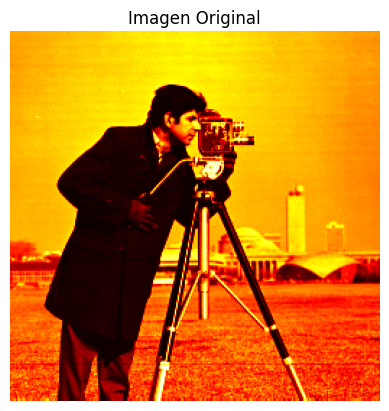

In [100]:
plt.imshow(im_gray, cmap='hot')
plt.title('Imagen Original')
plt.axis('off')
plt.show()

## 2. Operaciones
### 2.1 Copia de la imagen

In [101]:
im_gray_2 = im_gray.copy()

### 2.2 Operador :
#### 2.2.1 Dibujo de una línea horizontal

Dado que la imagen es tipo UINT8 los valores de los píxeles varían entre [0, 255]

In [102]:
im_gray_2[100, :] = 0

# Any line with 2 points

[x1,y1] = [50,50]
[x2,y2] = [55,100]


m = (y2-y1)/(x2-x1)
b = y1-m*x1

x_dim = im_gray_2.shape[0]
x_indexes = np.linspace(0, x_dim -1, num=x_dim, dtype=int)  # Alternative method


y_dim = im_gray_2.shape[1]
y_indexes = np.linspace(0, y_dim -1, num=y_dim, dtype=int)  # Alternative method

x_points = x_indexes[ x1:x2]
y_points =  [ int(x) for x in np.floor(x_points*m+b)]


idx = 0
for x in x_points:
   im_gray_2[x,y_points[idx]] = 255
   idx = idx + 1


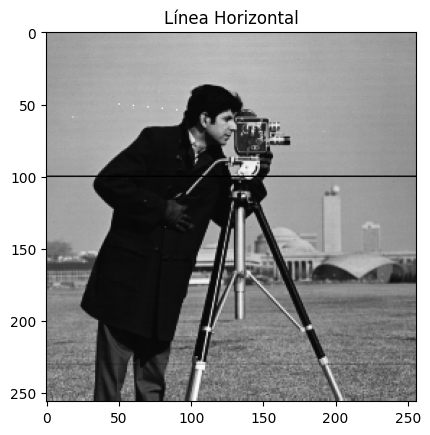

In [103]:
plt.imshow(im_gray_2, cmap='gray')
plt.title('Línea Horizontal')
#plt.axis('off')
plt.show()






        




In [104]:
#### 2.2.2 Dibujo de una línea vertical

In [105]:
im_gray_2[:, 100] = 0

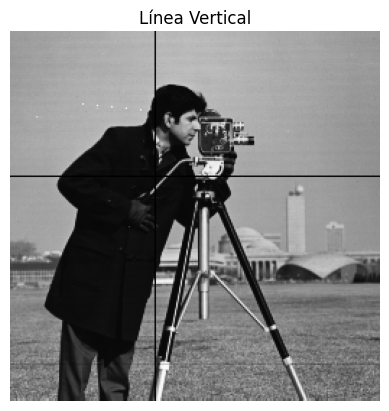

In [106]:
plt.imshow(im_gray_2, cmap='gray')
plt.title('Línea Vertical')
plt.axis('off')
plt.show()




### 2.3 Operador a:b

In [107]:
im_gray_2[80:120, 10:150] = 200

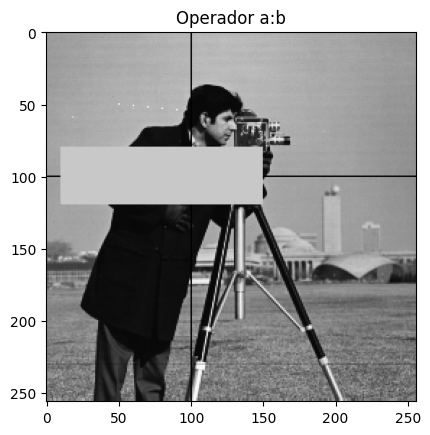

In [108]:
plt.imshow(im_gray_2, cmap='gray')
plt.title('Operador a:b')
plt.axis('on')
plt.show()

### 2.4 Segmentación 
#### 2.4.1 Uni-lateral

In [109]:
im_bw_s1 = im_gray > 20

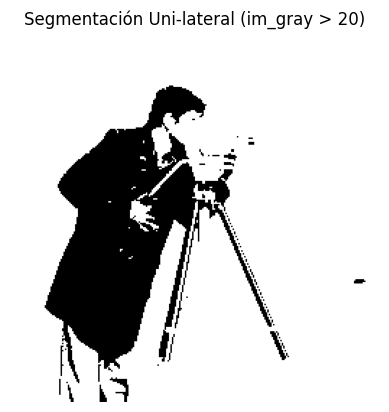


Forma de la imagen: (256, 256)
Tipo de datos: bool


In [110]:
plt.imshow(im_bw_s1, cmap='gray')
plt.title('Segmentación Uni-lateral (im_gray > 20)')
plt.axis('off')
plt.show()

# propiedades de im_bw_s1
print(f'\nForma de la imagen: {im_bw_s1.shape}')
print(f'Tipo de datos: {im_bw_s1.dtype}')

In [111]:
im_bw_s2 = np.logical_not(im_bw_s1)

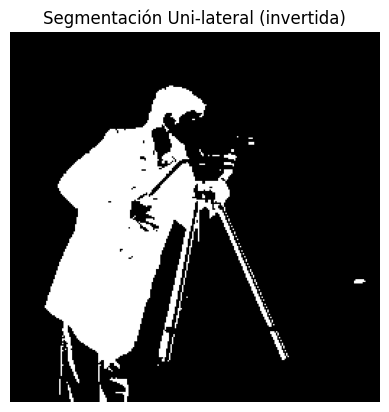

In [112]:
plt.imshow(im_bw_s2, cmap='gray')
plt.title('Segmentación Uni-lateral (invertida)')
plt.axis('off')
plt.show()

#### 2.4.2 Bi-lateral

In [113]:
im_bw_s3 = (im_gray > 10) & (im_gray < 50)

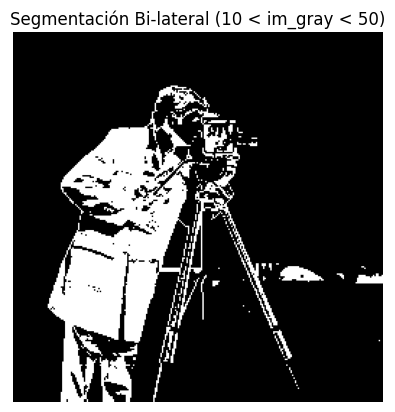

In [114]:
plt.imshow(im_bw_s3, cmap='gray')
plt.title('Segmentación Bi-lateral (10 < im_gray < 50)')
plt.axis('off')
plt.show()

<div style="text-align: center; margin: 20px 0;">
  <hr style="border: none; height: 2px; background: linear-gradient(to right, #bbb, #333, #bbb); width: 50%; margin: 0 auto;" />
</div>